In [ ]:
# Import de librerias
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split

import numpy as np

In [ ]:
# 'X' and 'y' con el dataset de load_digits
X, y = load_digits(return_X_y=True)

In [ ]:
                                                                                            # import del One hot encoder de sklearn
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
                                                                                            # reshape de 'y' para colocar cada clase en una fila. Es decir clase por fila
                                # Esto para poder colocar los 0s y 1s
integer_encoded = y.reshape(len(y), 1)

# One hot encoding de 'y'
y2 = onehot_encoder.fit_transform(integer_encoded)
print(y2)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
                                                                                              # Separación de datos de entrenamiento (train) y datos de testeo (test)
                                                                                              # Los datos de 'y' one hot llevan 'hot' en el nombre
                                                                                              # Los datos de 'y' normal no incluyen 'hot'. 
                                                                                              # Estos datos seran para el calculo de accuracy 
X_train, X_test, y_train_hot, y_test_hot, y_train, y_test = train_test_split(
    X, y2, y, test_size=0.15, random_state=0)

In [ ]:
                                                                                              # Función softmax
def softmax(z):
    
                                                                                              # Calculo del exponente (e) de z
  exp = np.exp(z)
    
                                                                                                # Calculo para todas las entradas
  for i in range(len(z)):
                                                                                                # /= --> es la división
    exp[i] /= np.sum(exp[i])                                                                    # suma de todos los exponentes
        
  return exp

In [ ]:
def train(X, y, y_hot, alpha, epochs):
  # X --> entrada
  # y --> etiquetas "verdaderas"
  # y_hot --> one hot encoding de y
  # alpha --> valor de aprendizaje
  # epochs --> número máximo de iteraciones
  # epoch --> iteración actual
  epoch = 0
    
        
  # t --> total de datos de entrenamiento
  # n --> total de características
  t, n = X.shape
  # c --> total de clases
  c = y_hot.shape[1]
    
  # Pesos aleatorios 
  W = np.random.rand(n, c)
  # Bias de -1
  b = np.negative(np.ones(c))

  # Aquí se almacenará la pérdida
  losses = []

  # 100% de pérdida para comenzar
  loss = 1.0
    
  # Bucle para entrenar el modelo hasta que la perdida sea de cero
  # o hasta que se alcance el límite de iteraciones (epocas)
  while loss > 0 and epoch < epochs:
    # Calculo de probabilidades para la predicción
    z = X.dot(W) + b
    y_pred = softmax(z) # función softmax
        
    # Derivada de función de costo para w y b
    w_grad = (1/t)*np.dot(X.T, (y_pred - y_hot))
    b_grad = (1/t)*np.sum(y_pred - y_hot)
        
    # Ajuste de pesos y bias
    W = W - alpha*w_grad
    b = b - alpha*b_grad
        
    # Calculo de perdida
    loss = -np.mean(np.log(y_pred[np.arange(len(y)), y]))
    losses.append(loss)
    epoch += 1

  return W, b, losses # Devuelve los pesos y las perdidas

In [ ]:
def predict(X, w, b):
  # X --> entradas
  # w --> pesos
  # b --> bias
    
  # Prediciones utilizando los pesos ya calculados
  z = X.dot(w) + b
  y_pred = softmax(z)
    
  # Devulve la clase con mayor probabilidad
  return np.argmax(y_pred, axis=1)

In [ ]:
# Entrenamiento con 200 epocas y alpha de 0.1
w, b, errors = train(X_train, y_train, y_train_hot, 0.1, 200)

In [ ]:
# Resultado de predicciones se almacena en y_test_predict
y_test_predict = predict(X_test, w, b)

In [ ]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_predict)

0.9407407407407408

In [ ]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.87      0.96      0.91        27
           2       0.96      0.96      0.96        25
           3       0.96      0.96      0.96        23
           4       1.00      1.00      1.00        17
           5       0.96      0.84      0.90        31
           6       1.00      0.94      0.97        34
           7       0.97      0.97      0.97        33
           8       0.92      0.86      0.89        28
           9       0.84      0.97      0.90        33

    accuracy                           0.94       270
   macro avg       0.95      0.95      0.95       270
weighted avg       0.94      0.94      0.94       270



Text(0.5, 1.0, 'Loss')

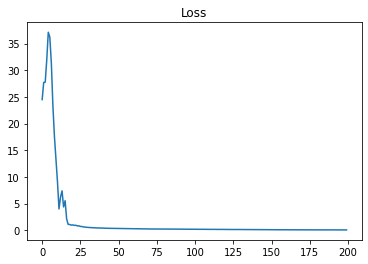

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(errors)
plt.title('Loss')

In [ ]:
#X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3)

In [ ]:
np.shape(X)

(1797, 64)

In [ ]:
np.shape(y)

(1797,)

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
# Entrenamiento con X_train, y_train
clf.fit(X_train, y_train)

Perceptron()

In [ ]:
# Predicciones de X_test
y_pred = clf.predict(X_test)

In [ ]:
# Accuracy score
clf.score(X_test, y_test)

0.9444444444444444

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.89      0.93      0.91        27
           2       1.00      0.96      0.98        25
           3       0.85      0.96      0.90        23
           4       0.89      1.00      0.94        17
           5       0.91      1.00      0.95        31
           6       1.00      0.97      0.99        34
           7       0.97      0.94      0.95        33
           8       0.92      0.86      0.89        28
           9       1.00      0.88      0.94        33

    accuracy                           0.94       270
   macro avg       0.94      0.95      0.94       270
weighted avg       0.95      0.94      0.94       270

